<a href="https://colab.research.google.com/github/andandandand/practical-computer-vision/blob/main/notebooks/Looking_into_LeNet5_with_Random_Weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Looking into LeNet-5 with random weight initialization


#### Author: Antonio Rueda-Toicen

**antonio.rueda.toicen 'at' hpi 'dot' de**


[![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)](http://creativecommons.org/licenses/by/4.0/)

This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![](https://raw.githubusercontent.com/andandandand/images-for-colab-notebooks/refs/heads/main/Lenet5.png)

[LeNet-5](https://en.wikipedia.org/wiki/LeNet), developed by Yann LeCun in 1998, was the one of the first architectures that could effectively recognize patterns on images.

LeNet has a simple structure: input layer, two convolutional layers with pooling, followed by fully connected layers.

LeNet-5 recognizes handwritten digits by using local receptive fields with shared weights and spatial subsampling (pooling) before feeding the resulting downsampled images into fully connected layers.

This architecture became a blueprint for modern CNNs.

In this notebook we explore the diagram of its architecture by implementing it in PyTorch. Note that this diagram is different than the one shown in the ["Gradient Based Learning Applied to Document
Recognition"](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf) publication from 1998. There are different variations of the architecture that is call "LeNet-5". This one uses the 28x28 input pixel matrix that is most popular today.

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision.transforms.v2 import ToImage, ToDtype
import matplotlib.pyplot as plt

# Define the transformations
transform = transforms.Compose([
    ToImage(),
    ToDtype(torch.float32, scale=True)
])

# Load MNIST dataset with the transformations
mnist_dataset = torchvision.datasets.MNIST(
    root='./data',  # Where to store the dataset
    train=True,     # Use training set
    download=True,  # Download if not already in your instance
    transform=transform
)

# Get a single image
image, label = mnist_dataset[0]  # Get the first image and its label


In [21]:
# Print information about the image
print(f"Image shape: {image.shape}")
print(f"Image dtype: {image.dtype}")
print(f"Image min value: {image.min()}")
print(f"Image max value: {image.max()}")
print(f"Label: {label}")

Image shape: torch.Size([1, 28, 28])
Image dtype: torch.float32
Image min value: 0.0
Image max value: 1.0
Label: 5


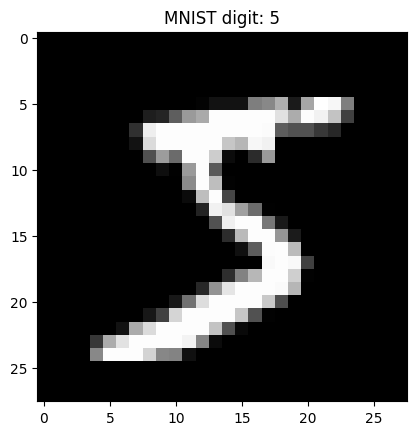

In [22]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"MNIST digit: {label}")
plt.show()

In [23]:
conv1 = nn.Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))

In [24]:
with torch.inference_mode():
  first_conv_output = conv1(image)

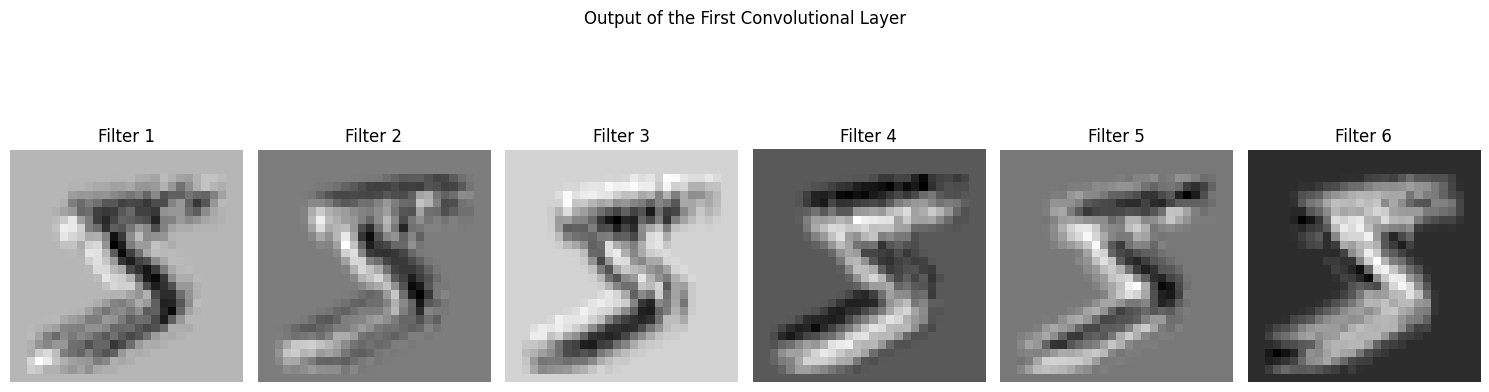

In [25]:

# Assuming 'first_conv_output' is the output from the first convolutional layer
# and it has the shape (number_of_filters, height, width)
num_filters = first_conv_output.shape[0]

# Create a figure and subplots
fig, axes = plt.subplots(1, num_filters, figsize=(15, 5))  # Adjust figsize as needed

# Loop through each filter's output and plot it
for i in range(num_filters):
    axes[i].imshow(first_conv_output[i].detach().numpy(), cmap='gray')  # Detach from computation graph if needed
    axes[i].axis('off')  # Turn off axis ticks and labels
    axes[i].set_title(f'Filter {i+1}')

fig.suptitle('Output of the First Convolutional Layer')


plt.tight_layout()  # Adjust subplot spacing
plt.show()

In [26]:
first_relu_output = F.relu(first_conv_output)
first_relu_output.shape

torch.Size([6, 28, 28])

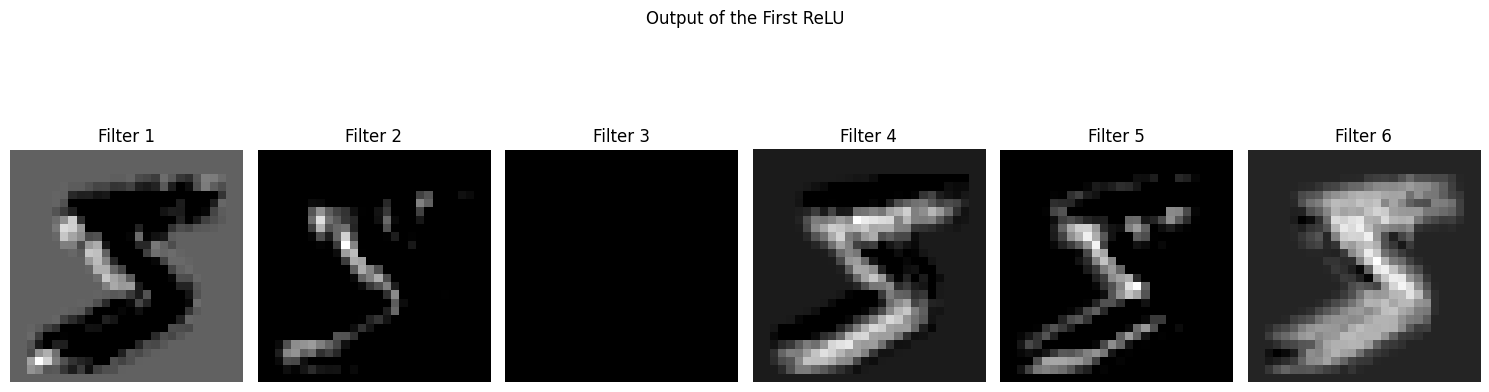

In [27]:
# Create a figure and subplots
fig, axes = plt.subplots(1, num_filters, figsize=(15, 5))  # Adjust figsize as needed

# Loop through each filter's output and plot it
for i in range(num_filters):
    axes[i].imshow(first_relu_output[i].detach().numpy(), cmap='gray')  # Detach from computation graph if needed
    axes[i].axis('off')  # Turn off axis ticks and labels
    axes[i].set_title(f'Filter {i+1}')

fig.suptitle('Output of the First ReLU')
plt.tight_layout()  # Adjust subplot spacing
plt.show()

In [28]:
first_max_pool_output = F.max_pool2d(input=first_relu_output, kernel_size=2, stride=2)
first_max_pool_output.shape

torch.Size([6, 14, 14])

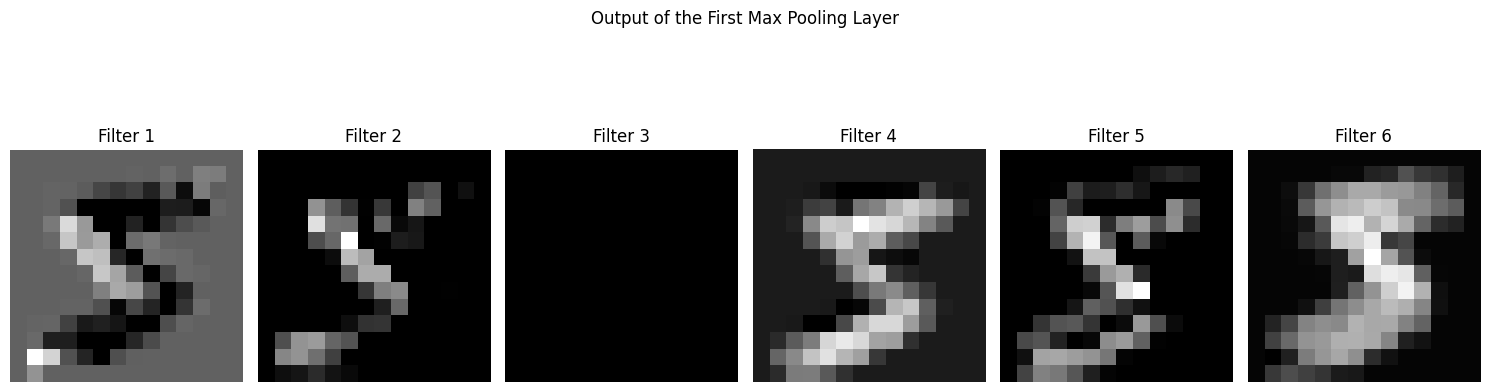

In [29]:
# Create a figure and subplots
fig, axes = plt.subplots(1, num_filters, figsize=(15, 5))  # Adjust figsize as needed

# Loop through each filter's output and plot it
for i in range(num_filters):
    axes[i].imshow(first_max_pool_output[i].detach().numpy(), cmap='gray')  # Detach from computation graph if needed
    axes[i].axis('off')  # Turn off axis ticks and labels
    axes[i].set_title(f'Filter {i+1}')


fig.suptitle('Output of the First Max Pooling Layer')
plt.tight_layout()  # Adjust subplot spacing
plt.show()

In [30]:
conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)

with torch.inference_mode():
  second_conv_output = F.relu(conv2(first_max_pool_output))

second_conv_output.shape

torch.Size([16, 10, 10])

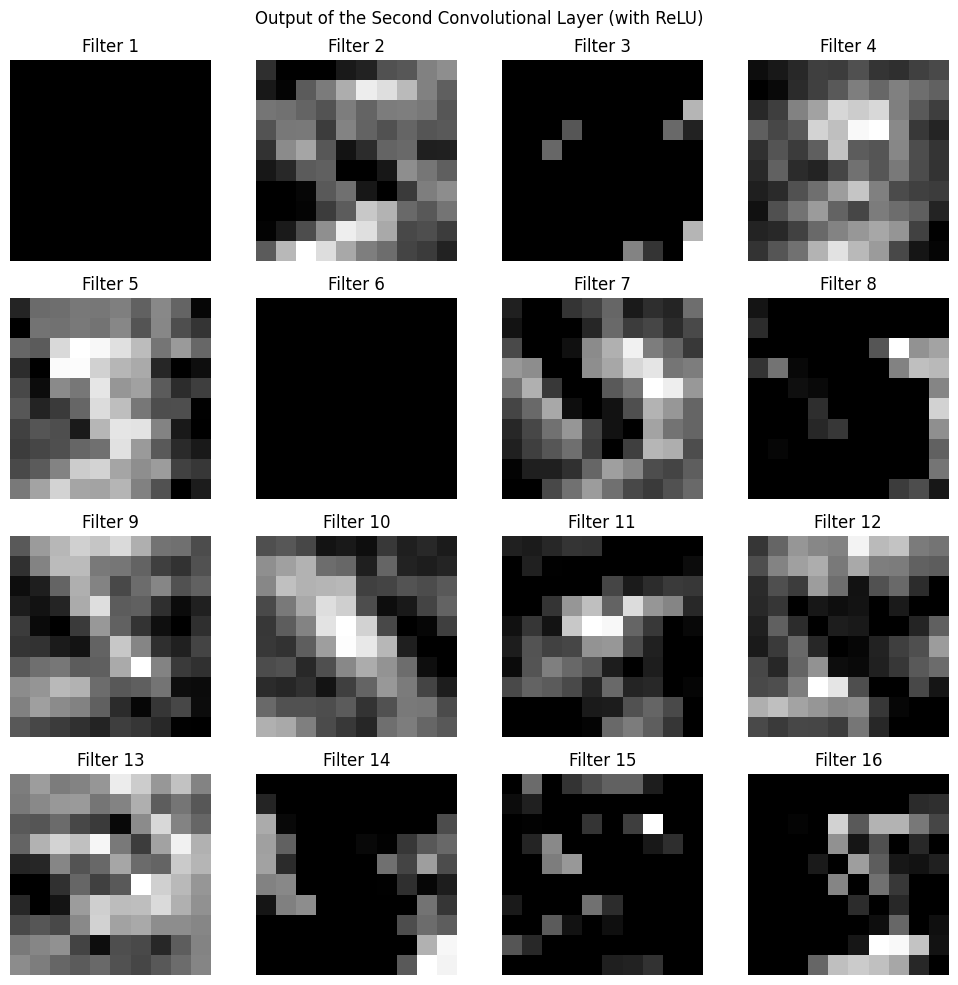

In [31]:
# Assuming 'second_conv_output' is the output from the second convolutional layer
# and it has the shape (number_of_filters, height, width)
num_filters = second_conv_output.shape[0]

# Create a figure and subplots with 4 rows and 4 columns
fig, axes = plt.subplots(4, 4, figsize=(10, 10))  # Adjust figsize as needed

# Loop through each filter's output and plot it
# 'k' will iterate through filters
# 'i' and 'j' will be used for row and column indexing in the subplot
k = 0
for i in range(4):  # 4 rows
    for j in range(4):  # 4 columns
        if k < num_filters:  # Make sure we don't exceed the number of filters
            axes[i, j].imshow(second_conv_output[k].detach().numpy(), cmap='gray')
            axes[i, j].axis('off')
            axes[i, j].set_title(f'Filter {k+1}')
            k += 1  # Move to the next filter
        else:
            axes[i, j].axis('off')  # Turn off unused subplots

fig.suptitle('Output of the Second Convolutional Layer (with ReLU)')
plt.tight_layout()  # Adjust subplot spacing
plt.show()

In [32]:
second_max_pool_output = F.max_pool2d(input=second_conv_output, kernel_size=2, stride=2)
second_max_pool_output.shape

torch.Size([16, 5, 5])

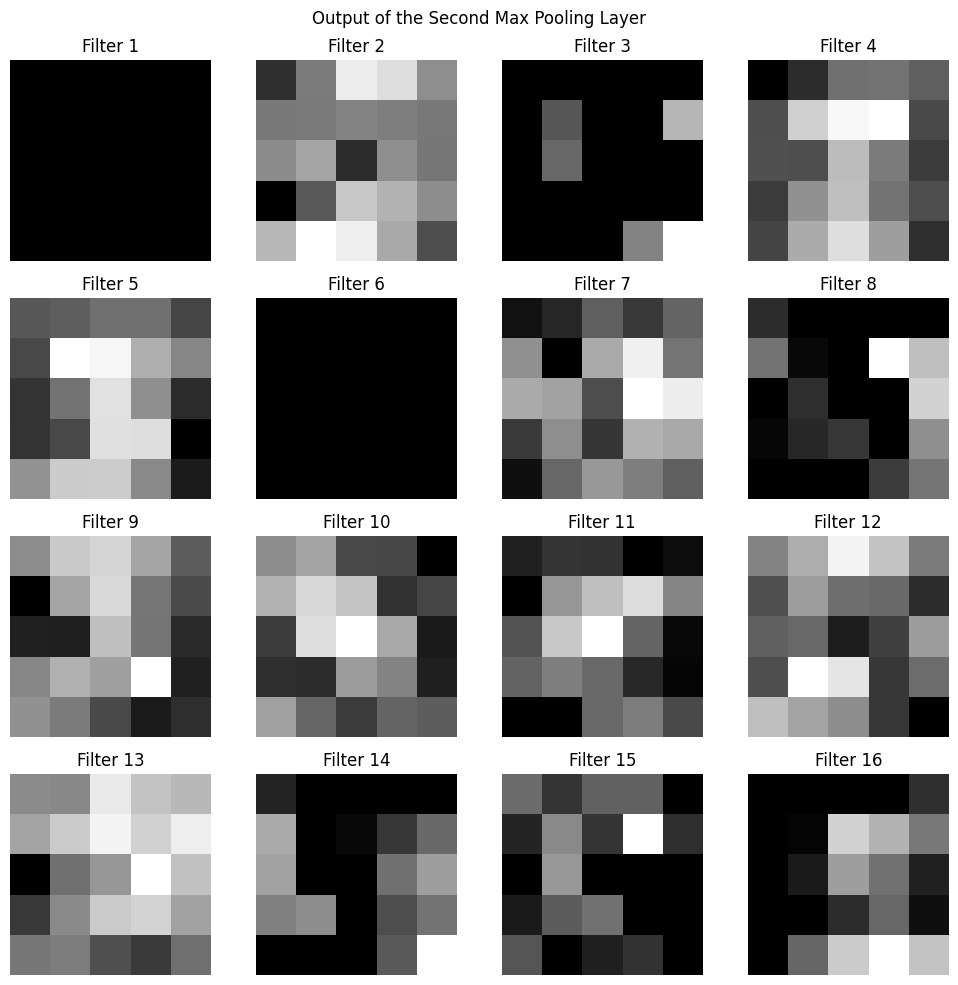

In [33]:
# Get the number of filters in the output
num_filters = second_max_pool_output.shape[0]

# Create a figure and subplots with 4 rows and 4 columns
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through each filter's output and plot it
k = 0  # Index for iterating through filters
for i in range(4):  # Rows
    for j in range(4):  # Columns
        if k < num_filters:
            axes[i, j].imshow(second_max_pool_output[k].detach().numpy(), cmap='gray')
            axes[i, j].axis('off')
            axes[i, j].set_title(f'Filter {k + 1}')
            k += 1
        else:
            axes[i, j].axis('off')  # Turn off unused subplots

fig.suptitle('Output of the Second Max Pooling Layer')
plt.tight_layout()
plt.show()

In [34]:
second_max_pool_output_flattened = second_max_pool_output.flatten()
second_max_pool_output_flattened.shape

torch.Size([400])

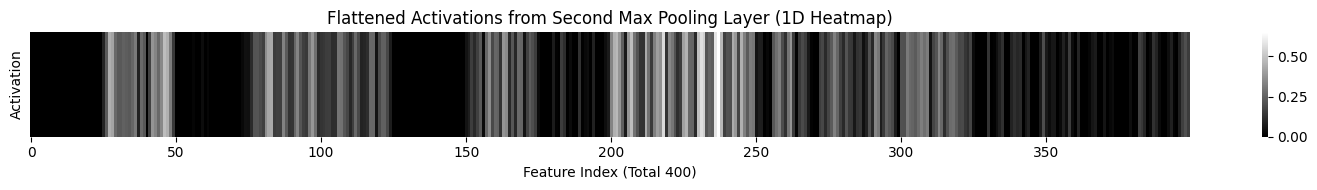

In [35]:
import seaborn as sns
# Plotting the flattened activations as a 1D heatmap
plt.figure(figsize=(15, 2)) # Adjust figsize as needed
sns.heatmap(
    second_max_pool_output_flattened.detach().numpy().reshape(1, -1), # Reshape to (1, num_features) for heatmap
    cmap='gray',
    cbar=True,
    yticklabels=False, # No need for y-axis ticks for a single row
    xticklabels=50    # Show a tick every 50 features to avoid clutter
)
plt.title('Flattened Activations from Second Max Pooling Layer (1D Heatmap)')
plt.xlabel('Feature Index (Total 400)')
plt.ylabel('Activation') # Or leave empty
plt.tight_layout()
plt.show()

In [36]:
output_first_linear_layer = nn.Linear(in_features=400, out_features=120)(second_max_pool_output_flattened)
output_first_linear_layer.shape

torch.Size([120])

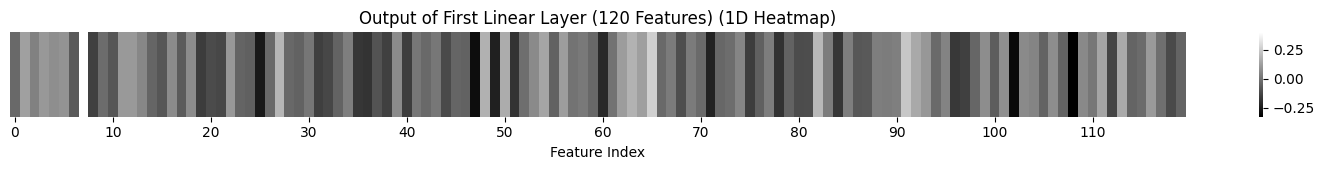

In [47]:
# Plotting the output of the first linear layer as a 1D heatmap
plt.figure(figsize=(15, 1.8)) # Adjust figsize as needed (width, height)
sns.heatmap(
    output_first_linear_layer.detach().numpy().reshape(1, -1), # Reshape to (1, num_features)
    cmap='gray',
    cbar=True,
    yticklabels=False,  # No need for y-axis ticks for a single row
    xticklabels=10      # Show a tick every 10 features (total 120 features)
)
plt.title('Output of First Linear Layer (120 Features) (1D Heatmap)')
plt.xlabel('Feature Index')
# plt.ylabel('Activation') # Optional, can be omitted for single row
plt.tight_layout()
plt.show()

In [37]:
output_second_linear_layer = nn.Linear(in_features=120, out_features=84)(output_first_linear_layer)
output_second_linear_layer.shape

torch.Size([84])

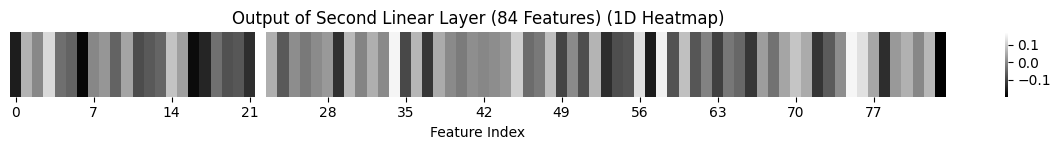

In [48]:
# Plotting the output of the second linear layer as a 1D heatmap
plt.figure(figsize=(12, 1.6)) # Adjust figsize as needed (width, height)
sns.heatmap(
    output_second_linear_layer.detach().numpy().reshape(1, -1), # Reshape to (1, num_features)
    cmap='gray',
    cbar=True,
    yticklabels=False,  # No need for y-axis ticks for a single row
    xticklabels=7       # Show a tick every 7 features (84 features / 12 ticks approx)
)
plt.title('Output of Second Linear Layer (84 Features) (1D Heatmap)')
plt.xlabel('Feature Index')
# plt.ylabel('Activation') # Optional, can be omitted for single row
plt.tight_layout()
plt.show()

In [38]:
output_third_linear_layer = nn.Linear(in_features=84, out_features=10)(output_second_linear_layer)
output_third_linear_layer.shape

torch.Size([10])

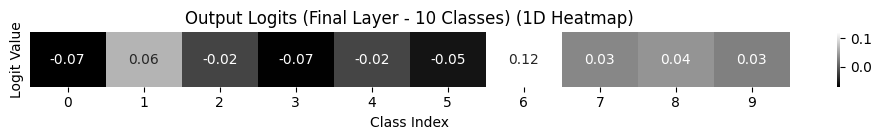

In [41]:
# Plotting the logits as a 1D heatmap
plt.figure(figsize=(10, 1.5)) # Adjust figsize as needed
sns.heatmap(
    output_third_linear_layer.detach().numpy().reshape(1, -1), # Reshape to (1, num_classes)
    cmap='gray',
    cbar=True,
    yticklabels=False, # No need for y-axis ticks
    xticklabels=[str(i) for i in range(10)], # Label x-ticks as class indices 0-9
    annot=True, # Optionally, show the values on the heatmap cells
    fmt=".2f"   # Format annotations to 2 decimal places
)
plt.title('Output Logits (Final Layer - 10 Classes) (1D Heatmap)')
plt.xlabel('Class Index')
plt.ylabel('Logit Value') # Or leave empty
plt.tight_layout()
plt.show()



In [46]:
# Also, let's see the predicted class with these random weights
probabilities = F.softmax(output_third_linear_layer, dim=0) # Apply softmax to get probabilities
predicted_class = torch.argmax(probabilities).item()

# Get the numpy arrays
logits_np = output_third_linear_layer.detach().numpy()
probabilities_np = probabilities.detach().numpy()

# Round for printing
import numpy as np
rounded_logits = np.round(logits_np, 3)
rounded_probabilities = np.round(probabilities_np, 3)

print(f"Predicted class (with random weights): {predicted_class}")
print('-------------------')
# Using the rounded versions for printing
print(f"Logits: {rounded_logits}")
print('-------------------')
print(f"Probabilities: {rounded_probabilities}")
print('-------------------')

Predicted class (with random weights): 6
-------------------
Logits: [-0.069  0.064 -0.019 -0.068 -0.018 -0.054  0.12   0.031  0.04   0.026]
-------------------
Probabilities: [0.093 0.106 0.097 0.093 0.098 0.094 0.112 0.102 0.103 0.102]
-------------------


## Follow-up Exercises & Exploration

Now that you've seen the activations of LeNet-5 with random weights, here are some ways to deepen your understanding:

1.  **Encapsulate into an `nn.Module`:**
    *   Refactor the LeNet-5 architecture into a Python class that inherits from `torch.nn.Module`.
    *   Define the layers in the `__init__` method and the forward pass logic in a `forward` method.
    *   Instantiate your model and pass the sample image through it to get the final output.
    *   *Hint: Remember to either include `F.relu` and `F.max_pool2d` in the `forward` method or to instantiate `nn.ReLU()` and `nn.MaxPool2d` inside your `__init__` method.

2.  **Add Activations to Fully Connected Layers:**
    *   Modify your step-by-step code (or your new `nn.Module` class) to include `F.relu` activations after the first two fully connected layers (the ones with 120 and 84 output features). The final layer (10 output features) should remain as logits (no activation).
    *   Observe if this changes the visual nature of the (still random) outputs of these layers if you were to plot them (though they are 1D vectors, so plotting might be less intuitive than feature maps).

3.  **Process a Batch of Images:**
    *   Use `torch.utils.data.DataLoader` to create a small batch of MNIST images (e.g., batch size of 4).
    *   Modify your code (especially if you've made an `nn.Module`) to process this batch.
    *   Pay attention to how the shapes of intermediate tensors change (they will now have a batch dimension).
    *   How would you need to adjust the plotting code to visualize the feature maps for, say, the first image in the batch?
    *   *Hint: check the shape of your batch tensor, remember that PyTorch expects B, C, H, W (batch size, channels, height, width) as the format of the tensor fed to the model.*

4.  **Interpret the Output:**
    *   Take the output of the final linear layer (`output_third_linear_layer`). This tensor represents the raw scores (logits) for each of the 10 digit classes.
    *   Apply `torch.nn.functional.softmax` to these logits along the class dimension to convert them into probabilities.
    *   Which digit does the randomly initialized network "predict" for the sample image? (It will be a random guess, but it's good practice to see the full pipeline).
    *   Use `torch.argmax` to find the predicted class index.

5.  **Experiment with Padding in `conv1`:**
    *   The first convolutional layer `conv1` uses `padding=(2,2)` with a `kernel_size=(5,5)` on a 28x28 image, resulting in a 28x28 output. This is often called "same" padding.
    *   What happens if you set `padding=(0,0)`? Calculate the expected output dimensions and verify by printing the shape. How does this affect the rest of the network dimensions if subsequent layers remain unchanged?

6.  **(Optional) Explore Different Initializations (Conceptual):**
    *  Specific initialization schemes (like Xavier/Glorot or Kaiming/He) are used to help with training.
    *   Research these methods. You don't need to implement them from scratch for this exercise, but understand *why* they are important. (This notebook focuses on architecture, not training, but it's a good related concept).

7.  **(Challenge) Train the Network:**
    *   This is a bigger step! Using your `nn.Module` LeNet-5 class:
        *   Define a loss function (e.g., `nn.CrossEntropyLoss`).
        *   Define an optimizer (e.g., `torch.optim.Adam` or `torch.optim.SGD`).
        *   Write a basic training loop:
            *   Iterate through the `DataLoader` for several epochs.
            *   For each batch: zero gradients, forward pass, compute loss, backward pass, optimizer step.
        *   After some training, pass the sample image through again. Do the activations (if you re-plot them) or the final prediction make more sense?